This generates a random image on the telescope. It represents one of 100 time-slices of an event.

In [4]:
from fact.plotting import Viewer
from numpy.random import poisson

# pseudo data:
data = poisson(30, (10, 1440))

# call the Viewer with data and a label for the colorbar:
Viewer(data, "label")

This colours every pixel according to it's id. So the numberes pixel-structure can be seen.

In [7]:
from fact.plotting import Viewer
from numpy.random import poisson
import numpy as np

# id data:
data = np.arange(1440)
# call the Viewer with data and a label for the colorbar:
Viewer(data, "Pixel Id", cmap='inferno')

Image sucessfully saved to /home/jbehnken/FACT_Image.png


This will gerate a diy representation of the fact viewer. 

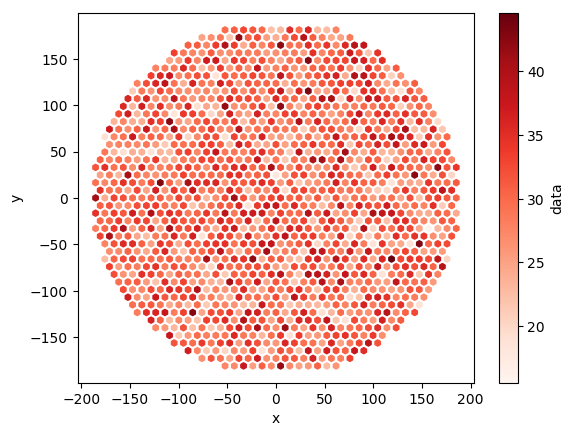

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
#
'''
The script plotts the hexagonal pixels of FACT with their value.
It needs the data-csv in the same folder.
'''

df = pd.read_csv('camera_bild.csv')

df.plot.scatter(x='x', y='y', c='data', cmap=plt.cm.Reds, marker='h')
#df.plot.hexbin(x='x', y='y', C='data', cmap=plt.cm.Reds, gridsize=37)
#plt.gca().set_facecolor('lightgrey')
plt.show()

# Dataformat exploration. What is in the file and which values can it adopt.

In [5]:
import json

with open('/home/jm/github/BA_FACT_Deeplearning/01_Getting_to_know_FACT/20170119_229_100events.phs.jsonl', 'r') as file:
    events = []
    for row in file:
        events.append(json.loads(row))

print("We've got \x1b[1;31m{} rows/events\x1b[0m in the file.".format(len(events)))

We've got 100 rows/events in the file.


In [5]:
from os import listdir

events = []
for data_file in listdir('/home/jm/github/BA_FACT_Deeplearning/99_data'):
    try:
        with open('../99_data/'+data_file, 'r') as file:
            for row in file:
                events.append(json.loads(row))
    except: pass

unique_keys = set()
for event in events:
    for key in list(event.keys()):
        unique_keys.add(key)

print('These are the \x1b[1;31munique json-keys\x1b[0m found in 7 runs:\n', unique_keys)

These are the unique json-keys found in 7 runs:
 {'Night', 'Run', 'UnixTime_s_us', 'Event', 'Zd_deg', 'Az_deg', 'SaturatedPixels', 'PhotonArrivals_500ps', 'Trigger'}


In [6]:
print('We are working with \x1b[1;31m{} events\x1b[0m right now.'.format(len(events)))

We are working with 3902 events right now.


In [7]:
unique_nights = set()
for event in events:
    unique_nights.add(event['Night'])

print('These are the \x1b[1;31munique Nights\x1b[0m found in 7 runs:\n', unique_nights)

These are the unique Nights found in 7 runs:
 {20170309}


In [8]:
unique_trigger = set()
for event in events:
    unique_trigger.add(event['Trigger'])

print('These are the \x1b[1;31munique Triggers\x1b[0m found in 7 runs:\n', unique_trigger)

print('''\n\x1b[1;31m1\x1b[0m: External trigger input 1. Here the GPS module triggers the read out 59 times a minute. These events are expected to contain only night-sky-background.
\x1b[1;31m2\x1b[0m: External trigger input 2. The same as external trigger input 1, since the GPS modul was switched from 1 to 2 once.
\x1b[1;31m4\x1b[0m: The self triggered mode, also called "physics trigger". These events are expected to contain light flashes and air showers.
\x1b[1;31m1024\x1b[0m: A random trigger also called "pedestal trigger". These events are also expected to only contain night-sky-background.
''')

These are the unique Triggers found in 7 runs:
 {1024, 2, 4}

1: External trigger input 1. Here the GPS module triggers the read out 59 times a minute. These events are expected to contain only night-sky-background.
2: External trigger input 2. The same as external trigger input 1, since the GPS modul was switched from 1 to 2 once.
4: The self triggered mode, also called "physics trigger". These events are expected to contain light flashes and air showers.
1024: A random trigger also called "pedestal trigger". These events are also expected to only contain night-sky-background.



In [9]:
range_az_deg = []
for event in events:
    range_az_deg.append(event['Az_deg'])

print('This is the \x1b[1;31mAz_deg range\x1b[0m found in 7 runs:\n', min(range_az_deg), max(range_az_deg))

This is the Az_deg range found in 7 runs:
 -120.68021010463956 -116.34277742542041


In [10]:
range_zd_deg = []
for event in events:
    range_zd_deg.append(event['Zd_deg'])

print('This is the \x1b[1;31mZd_deg range\x1b[0m found in 7 runs:\n', min(range_zd_deg), max(range_zd_deg))

This is the Zd_deg range found in 7 runs:
 11.636320009397238 13.03186014369696


This is the Event histogram from 7 runs:



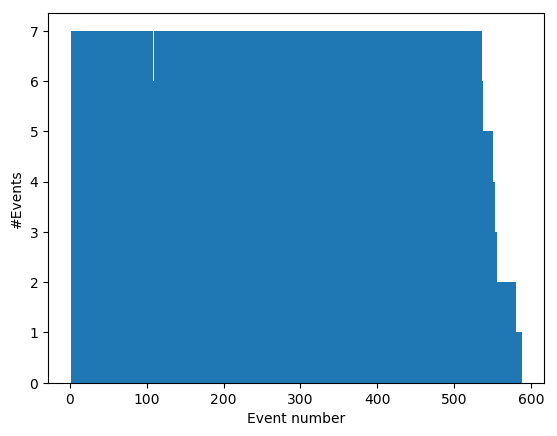

In [11]:
import matplotlib.pyplot as plt

histogram_event = []
for event in events:
    histogram_event.append(event['Event'])

print('This is the \x1b[1;31mEvent histogram\x1b[0m from 7 runs:\n')
plt.hist(histogram_event, bins=max(set(histogram_event)))
plt.xlabel('Event number')
plt.ylabel('#Events')
plt.show()

In [12]:
unique_run = set()
for event in events:
    unique_run.add(event['Run'])

print('These are the \x1b[1;31munique Runs\x1b[0m found in 7 runs:\n', unique_run)

These are the unique Runs found in 7 runs:
 {11, 12, 13, 14, 15, 16, 17}


In [13]:
unique_time_len = set()
for event in events:
    unique_time_len.add(len(event['UnixTime_s_us']))

print('These are the \x1b[1;31munique UnixTime_s_us-lens\x1b[0m found in 7 runs:\n', unique_time_len)
print('The first entry in the the array are the unix time seconds s, and the second entry are the additional micro seconds us.')

These are the unique UnixTime_s_us-lens found in 7 runs:
 {2}
The first entry in the the array are the unix time seconds s, and the second entry are the additional micro seconds us.


This is the SaturatedPixels histogram from 7 runs:



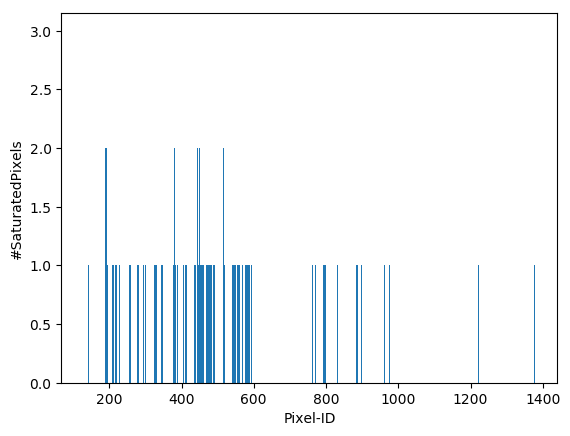

In [14]:
histogram_saturated = []
for event in events:
    for value in event['SaturatedPixels']:
        histogram_saturated.append(value)

print('This is the \x1b[1;31mSaturatedPixels histogram\x1b[0m from 7 runs:\n')
plt.hist(histogram_saturated, bins=max(histogram_saturated))
plt.xlabel('Pixel-ID')
plt.ylabel('#SaturatedPixels')
plt.show()

In [15]:
unique_photon_len = set()
for event in events:
    unique_photon_len.add(len(event['PhotonArrivals_500ps']))

print('These are the \x1b[1;31munique PhotonArrivals_500ps-lens\x1b[0m found in 7 runs:\n', unique_photon_len)

These are the unique PhotonArrivals_500ps-lens found in 7 runs:
 {1440}


In [16]:
histogram_photons = []
for event in events:
    for value in event['PhotonArrivals_500ps']:
        for i in value:
            histogram_photons.append(i)

print('There are \x1b[1;31m{} PhotonArrival-values\x1b[0m in this 7 runs:\n'.format(len(histogram_photons)))

There are 54511998 PhotonArrival-values in this 7 runs:



In [17]:
print('This is the \x1b[1;31mPhotonArrival range\x1b[0m found in 7 runs:\n', min(histogram_photons), max(histogram_photons))

This is the PhotonArrival range found in 7 runs:
 30 129


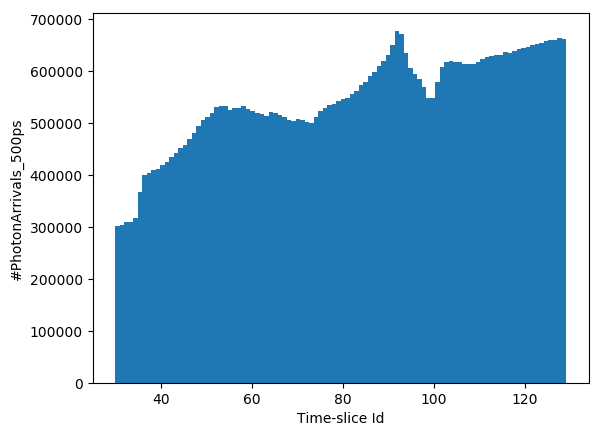

In [18]:
plt.hist(histogram_photons, bins=100)
plt.xlabel('Time-slice Id')
plt.ylabel('#PhotonArrivals_500ps')
plt.show()

In [19]:
print("These are some PhotonArrival-lists:\n\x1b[1;31mWhy aren't they ordered?\nMultiple values in one liste means there were multiple photons?\x1b[0m\n")

for event in events[:2]:
    for value in event['PhotonArrivals_500ps']:
        print(value)

These are some PhotonArrival-lists:
Why aren't they ordered?
Multiple values in one liste means there were multiple photons?

[98, 98, 110, 109, 33, 97, 113, 55, 96, 113, 32]
[37, 98, 37, 97, 58, 105]
[68, 67, 96, 125, 67, 95, 124, 67, 95, 120]
[79, 123, 79, 121]
[62, 62, 61, 68, 60, 69, 69, 57, 69, 38, 51, 69, 108]
[49, 49, 49, 48, 59, 81, 58, 81, 45, 112, 79, 58, 69, 112, 81, 39, 122]
[71, 78, 62, 78, 61, 77, 94]
[93, 111, 62, 92, 111, 48, 62, 92, 110, 73, 102, 119]
[61, 61, 129, 61]
[45, 45, 45, 62, 44, 60]
[66, 65, 65, 124, 74, 122, 62, 74, 97, 117, 128]
[78, 101, 78, 101, 78, 101, 77, 106, 86, 100, 109]
[123, 122, 122, 58, 122, 58, 76, 122, 76]
[60, 60, 60, 59, 59, 59, 95, 127, 66, 94, 58, 127, 93]
[113, 82, 113, 81, 113]
[42, 42, 124, 51, 40, 113, 124]
[91, 91, 91, 117, 91, 102, 117]
[84, 30, 89, 30, 82, 122, 91, 30, 122, 80, 92]
[112, 111, 111, 120, 65, 120]
[71, 71, 99, 71]
[84, 82, 90, 125, 90, 124, 79, 121, 93, 129]
[55, 54, 54, 34, 54, 33, 54, 62, 33, 53, 62]
[54, 110]
[79, 

# Creating an input vector

Approach: 

Creating a 2D matrix with Pixel-Ids (1440) and Time-slice-Ids (100) as 1440x100 matrix.

Initialize the matrix with zeros.

Iterate over the 'PhotonArrivals_500ps' and count +1 for every entry.

Load the matrix liny by line to get the input_vector.

In [20]:
import numpy as np
input_matrix = np.zeros([1440,100])

for i in range(1440):
    for j in events[0]['PhotonArrivals_500ps'][i]:
        input_matrix[i][j-30] += 1

In [21]:
print(input_matrix)
print('Shape:', input_matrix.shape)

[[ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Shape: (1440, 100)


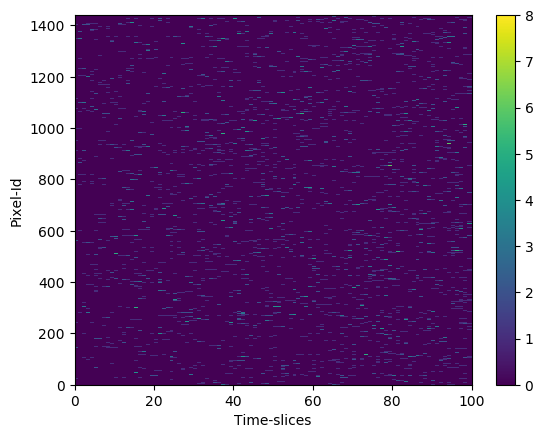

In [22]:
plt.pcolor(input_matrix)
plt.xlabel('Time-slices')
plt.ylabel('Pixel-Id')
plt.colorbar()
plt.show()

In [23]:
highest_number = []
for number in range(500):
    input_matrix = np.zeros([1440,100])
    for i in range(1440):
        for j in events[number]['PhotonArrivals_500ps'][i]:
            input_matrix[i][j-30] += 1
    highest_number.append([number, input_matrix.max()])

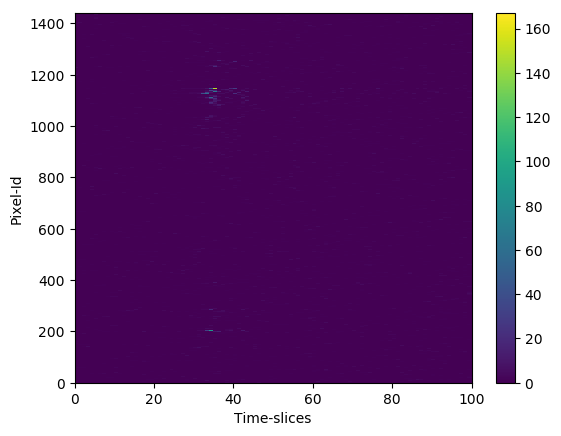

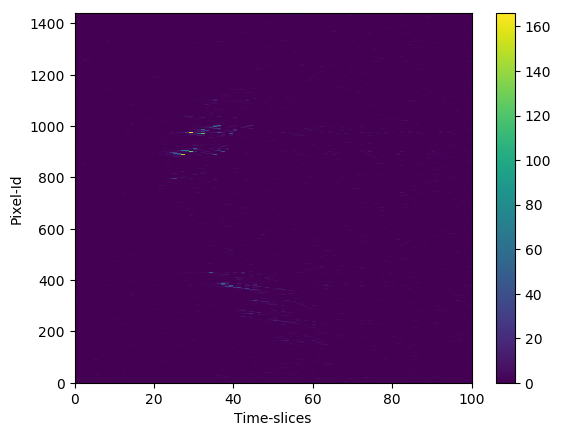

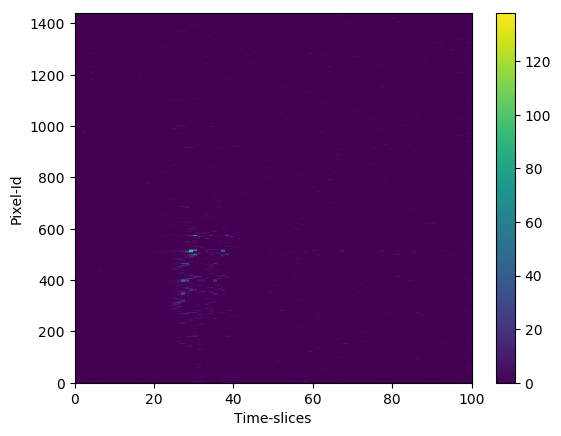

In [24]:
from operator import itemgetter


for number, _ in sorted(highest_number, key=itemgetter(1), reverse=True)[:3]:
    input_matrix = np.zeros([1440,100])
    for i in range(1440):
        for j in events[number]['PhotonArrivals_500ps'][i]:
            input_matrix[i][j-30] += 1
    plt.pcolor(input_matrix)
    plt.xlabel('Time-slices')
    plt.ylabel('Pixel-Id')
    plt.colorbar()
    plt.show()

# Hexagonal structure to 2D matrix

45 zeilen hoch

47 spalten breit

In [1]:
45*47

2115